In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import nltk;
import spacy
import string

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})

np.random.seed(42)
%config Completer.use_jedi = False
pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 100)

nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv('mindvalley_tweets.csv')
df.rename(columns={"tweet":"comments"},inplace=True)
df.head()

,Unnamed: 0,comments
0,0,"@Vishen , a CEO that I would REALLY love to he..."
1,1,The latest episode of the @mindvalley podcast ...
2,2,@ImPaulMcKenna @mindvalley A new way of learni...
3,3,@moneyman11_c @Vishen @mindvalley What is real...
4,4,@manojaryan @Vishen @mindvalley It messed with...


In [3]:
df.comments[286]

'I wake up at 3am to do stock stuff and homework. But instead of homework I work on @mindvalley Lifebook to learn myself as a person. Knowing me&gt;Geology'

In [4]:
df.comments.replace("\S*@\S*" , "", regex=True, inplace = True)
df.comments.replace("\S*#\S*" , "", regex=True, inplace = True)
df.comments.replace("\S*http\S*" , "", regex=True, inplace = True)
df.comments.replace("_" , " ", regex=True, inplace = True)
df.comments.replace("^" , " ", regex=True, inplace = True)
df.comments.replace("\n" , " ", regex=True, inplace = True)

In [5]:
df.comments[286]

' I wake up at 3am to do stock stuff and homework. But instead of homework I work on  Lifebook to learn myself as a person. Knowing me&gt;Geology'

In [6]:
for i in string.punctuation:
    try:
        df.comments.replace(f"\{i}" , "", regex=True, inplace = True)
    except: pass

In [7]:
df.comments[286]

' I wake up at 3am to do stock stuff and homework But instead of homework I work on  Lifebook to learn myself as a person Knowing megtGeology'

In [8]:
junk_words = "ve xx tqvm yessssssssssit youuuuuu nan nt citi kashif a very were yet than through via here rishisunak more much getting go going ive dont able when which who year barclays hsbcin amp like an no any since after banking im there out how starlingbank starling one only again over other then am may some do cant about banks would could its even their after has them get got within now all just if what or at had hsbcukbusiness up by into will an was our us so been hsbcuk co om ke ha gone your we can from as but to the hsbc and of you for are have they is my hsbc_uk with it in on this ðÿ be not bank me that"
junk_words_list = junk_words.split(" ")

In [9]:
def remove_unicode(text):

    try:
        text = text.encode("latin_1").decode("raw_unicode_escape").encode('utf-16', 'surrogatepass').decode('utf-16')
    except:
        text = text

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)

    text = re.sub(emoji_pattern, '', str(text))
    text = ''.join(text.split('\\n')) # to remove uncompiled \n
    text = re.sub('\n', '', text)     # to remove compiled \n

    return text

In [10]:
def word_root(text):
    list_data3=[]
    text = remove_unicode(text)
    doc = nlp(text)
    for token in doc:
        if token.text.isalpha():
            lemma = token.lemma_
            list_data3.append(lemma)
        else:pass
    return " ".join(list_data3)
df.comments = df.comments.apply(lambda x: word_root(str(x).lower()))  

In [11]:
df.comments.value_counts()

thank you                                                                                                                                                                                                                   4
learn more about how ruthless consistency be the key to business success by listen to my recent podcast episode with                                                                                                        2
thank for the mention                                                                                                                                                                                                       2
in this episode kshitij minglani the cofounder of talk about hire strategy that attract talent who crave growth do away with email and make nondelusional decision                                                          2
agree                                                                                                           

In [12]:
df.replace('nan', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)
df.replace('do', np.nan, inplace = True)
df = df.dropna()

In [13]:
df.comments.value_counts()

thank you                                                                                                                                                                                                                   4
learn more about how ruthless consistency be the key to business success by listen to my recent podcast episode with                                                                                                        2
thank for the mention                                                                                                                                                                                                       2
in this episode kshitij minglani the cofounder of talk about hire strategy that attract talent who crave growth do away with email and make nondelusional decision                                                          2
agree                                                                                                           

In [14]:
list_data = df.comments.unique().tolist()

In [15]:
len(list_data)

398

In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
# distilbert-base-nli-mean-tokens
# paraphrase-distilroberta-base-v1
# roberta-large-nli-stsb-mean-tokens
#allenai-specter


In [18]:
model=SentenceTransformer('xlm-r-distilroberta-base-paraphrase-v1')
embeddings = model.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

In [19]:
best_model = umap.UMAP(n_components=5).fit_transform(embeddings)

#n_neighbors=10, min_dist=0.0, 

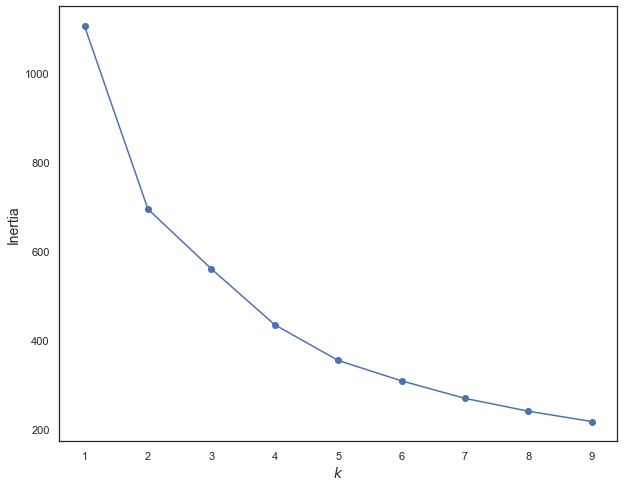

In [20]:
#inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(best_model)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [21]:
from nltk.cluster import KMeansClusterer,euclidean_distance
clusterer =KMeansClusterer(3,euclidean_distance)
cluster=np.array(clusterer.cluster(best_model,True))

In [22]:
cluster = KMeans(n_clusters=3, init="k-means++").fit_predict(best_model)

In [23]:
def plot(cluster = cluster):    

    clustered = (cluster >= 0)
    reduced_dim = umap.UMAP(n_components=2).fit_transform(embeddings)



    unique, counts = np.unique(cluster, return_counts=True)
    print(dict(zip(unique, counts)))

    plt.scatter(reduced_dim[~clustered, 0],
                reduced_dim[~clustered, 1],
                c=(0.5,0.5,0.5),
                # s=1,
                alpha=0.5
                )
    plt.scatter(reduced_dim[clustered, 0],
                reduced_dim[clustered, 1],
                c=cluster[clustered],
                # s=1,
                cmap='Accent')
    plt.show()

{0: 161, 1: 124, 2: 113}


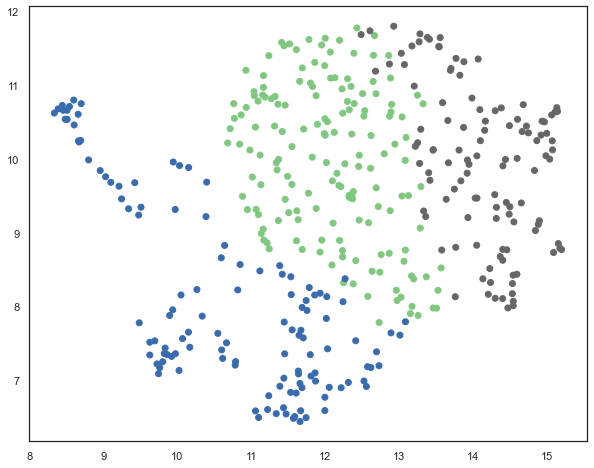

In [24]:
plot()

In [25]:
len(cluster)

398

In [26]:
docs = pd.DataFrame(list_data,columns=["comments"])
docs["cluster"] = cluster
labeled_docs = docs.groupby(["cluster"], as_index=False).agg({"comments": " ".join})
labeled_docs.comments.replace(r"\S*clas\S*", "class", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*teach\S*", "teach", regex=True, inplace = True)
labeled_docs

,cluster,comments
0,0,a new way of learn well and well every day wha...
1,1,just finish film another quest with mindvalley...
2,2,a ceo that I would really love to hear on your...


In [27]:
from keybert import KeyBERT
array_text = labeled_docs.comments.tolist()
    
kw_extractor = KeyBERT(model=model)
trigram = []
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(3, 3))
    print(f'\033[1m   Trigram Cluster {j+1}: \033[0m')
    print([word for word in keywords])
    trigram.append([word[0] for word in keywords])

   Trigram Cluster 1: 
[('extraordinary mind vlog', 0.4075), ('exist dreaming mind', 0.4055), ('change world thing', 0.4039), ('mind outside mind', 0.4004), ('mind therapist mind', 0.3948), ('really prove mind', 0.3931), ('outside mind hey', 0.3918), ('exactly mess mindi', 0.3903), ('create reality paradigm', 0.3885), ('code extraordinary mind', 0.3801)]
   Trigram Cluster 2: 
[('finish film quest', 0.4092), ('great buddy thank', 0.3898), ('just finish film', 0.3821), ('stay awesome time', 0.3693), ('thank buddy thank', 0.3652), ('thank just complete', 0.3642), ('memory good luck', 0.3591), ('thank mention complete', 0.355), ('journey thank complete', 0.3537), ('thank awesome list', 0.3518)]
   Trigram Cluster 3: 
[('love hear podcast', 0.5755), ('reason listen podcast', 0.5558), ('really like podcast', 0.5489), ('listen podcast episode', 0.5383), ('podcast episode listen', 0.5272), ('entire podcast gorgeous', 0.5264), ('listen recent podcast', 0.5199), ('hear entire podcast', 0.519), 

In [28]:
bigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=3,keyphrase_ngram_range=(2, 2))
    print(f'\033[1m   Bigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    bigram.append([word[0] for word in keywords])

   Bigram Cluster 1: 
[('prove mind', 0.406), ('extraordinary mind', 0.4), ('reality paradigm', 0.3867)]
   Bigram Cluster 2: 
[('soon thank', 0.3876), ('successjust thank', 0.3797), ('good luck', 0.3654)]
   Bigram Cluster 3: 
[('fav podcast', 0.5459), ('episode listen', 0.519), ('hear podcast', 0.5183)]


In [29]:
unigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(1, 1))
    print(f'\033[1m   Unigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    unigram.append([word[0] for word in keywords])

   Unigram Cluster 1: 
[('mindset', 0.3584), ('thoughtsimagination', 0.3018), ('reality', 0.3008), ('mind', 0.2836), ('distraction', 0.2809), ('mindi', 0.2759), ('paradigm', 0.2718), ('transformative', 0.2675), ('mindfulness', 0.2635), ('consciousness', 0.2631)]
   Unigram Cluster 2: 
[('thank', 0.3315), ('eclipse', 0.3172), ('thankyouappreciate', 0.3138), ('finish', 0.2931), ('good', 0.29), ('try', 0.2843), ('end', 0.2756), ('great', 0.2753), ('successjust', 0.2733), ('hope', 0.2722)]
   Unigram Cluster 3: 
[('podcast', 0.4055), ('watch', 0.3759), ('enjoy', 0.3662), ('video', 0.348), ('youtube', 0.3461), ('appreciate', 0.3411), ('listen', 0.329), ('audience', 0.328), ('fascinating', 0.3274), ('twitter', 0.3244)]


In [30]:
for i in range(3):
    clusterer=[]
    print(f'\033[1m   Cluster {i+1}: \033[0m')
    clusterer.append(trigram[i][0])
    
    wor=[]
    for w in trigram[i][1].split(" "):
        wor.append(w in trigram[i][0])
    if all(wor):
        clusterer.append(trigram[i][2])
    else:
        clusterer.append(trigram[i][1])
        
    for m, n in zip(trigram[i][0:2]*5,bigram[i][0:10]):
        first,second = n.split(" ")
        if not(first in m and second in m):
            clusterer.append(n)
    clusterer = clusterer[:5]
    [clusterer.append(j) for j in unigram[i]]
    print(clusterer)
    

   Cluster 1: 
['extraordinary mind vlog', 'exist dreaming mind', 'prove mind', 'extraordinary mind', 'reality paradigm', 'mindset', 'thoughtsimagination', 'reality', 'mind', 'distraction', 'mindi', 'paradigm', 'transformative', 'mindfulness', 'consciousness']
   Cluster 2: 
['finish film quest', 'great buddy thank', 'soon thank', 'successjust thank', 'good luck', 'thank', 'eclipse', 'thankyouappreciate', 'finish', 'good', 'try', 'end', 'great', 'successjust', 'hope']
   Cluster 3: 
['love hear podcast', 'reason listen podcast', 'fav podcast', 'episode listen', 'podcast', 'watch', 'enjoy', 'video', 'youtube', 'appreciate', 'listen', 'audience', 'fascinating', 'twitter']
